<a href="https://colab.research.google.com/github/Milena-DataScientist/BikeSharing/blob/main/Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color ='pickle'>**Bike Sharing Dataset Location**

- You may download the data from following link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand



# <font color = 'pickle'>**Import/Install the packages**




In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [2]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn learning -q

     |████████████████████████████████| 290 kB 3.0 MB/s 
     |████████████████████████████████| 31.2 MB 21.1 MB/s 


# <font color = 'pickle'>**Import/Install the packages**


In [4]:
"""Importing the required packages"""

import feature_engine
import sklearn

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# For splitting the dataset
from sklearn.model_selection import train_test_split

#To drop features
from feature_engine.selection import DropFeatures

# For categorical variables
from feature_engine.encoding import OneHotEncoder

# For scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# creating pipelines 
from sklearn.pipeline import Pipeline

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV


# Using KNN regressor to our data
from sklearn.neighbors import KNeighborsRegressor


# feature engine log transformation
from feature_engine.transformation import YeoJohnsonTransformer

#Discretization
from sklearn.preprocessing import KBinsDiscretizer

#Handling Outliers
from feature_engine.outliers import Winsorizer

# feature engine wrapper 
from feature_engine.wrappers import SklearnTransformerWrapper

#pipeline graph
from sklearn import set_config

# <font color = 'pickle'> **Specify Project Folder Location**

In [5]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/Data/')
else:
    base_folder = Path('/content/drive/MyDrive/AppliedML/Lecture7')

In [6]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2022'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
sys.path.append(str(custom_function_folder))

In [9]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Data/custom-functions']

In [10]:
from plot_learning_curve import plot_learning_curve

In [11]:
from eda_plots import diagnostic_plots, plot_target_by_category

# <font color = 'pickle'> **Import Custom Functions from Python file**

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
sys.path.append(str(custom_function_folder))

In [14]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Data/custom-functions',
 '/content/drive/MyDrive/Data/custom-functions']

In [15]:
from plot_learning_curve import plot_learning_curve

In [16]:
from eda_plots import diagnostic_plots, plot_target_by_category

#<font color = 'pickle'> **Obtaining Data** </font>


## **<font color ='orange'>Attribute Information:**</font>

Attribute description from https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#

1. Date : year-month-day
2. Rented Bike count - Count of bikes rented at each hour
3. Hour - Hour of he day
4. Temperature-Temperature in Celsius
5. Humidity - %
6. Windspeed - m/s
7. Visibility - 10m
8. Dew point temperature - Celsius
9. Solar radiation - MJ/m2
10. Rainfall - mm
11. Snowfall - cm
12. Seasons - Winter, Spring, Summer, Autumn
13. Holiday - Holiday/No holiday
14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [17]:
Bike = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv", encoding= 'unicode_escape')


#<font color ='pickle'>**EDA and identifying the preprocessing steps.** 

# <font color = 'pickle'>**Exploratory data analysis**

## <font color = 'Orange'>**Checking Data**

### <font color = 'Orange'>**Checking a few rows**

In [18]:
Bike.head() # lets start by looking at the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### <font color = 'Orange'>**Checking column names**

In [19]:
Bike.columns  # looking at all the column names 

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### <font color = 'Orange'>**Checking column data types**

In [20]:
Bike.info() #checking for the type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### <font color = 'Orange'>**Checking for unique values**

In [21]:
Bike.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

### <font color = 'Orange'>**Checking duplicate rows**

In [22]:
print(Bike.duplicated().any())

False


### <font color = 'Orange'>**Checking for missing values**

In [23]:
Bike.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### <font color = 'Orange'>**Checking summary statistics** </font> 

In [24]:
Bike.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## **<font color ='orange'>Identifying numerical, categorical and discrete variables**</font>

In [25]:
#list of categorical variabels
categorical = [var for var in Bike.columns if Bike[var].dtype.name =='object']

#list of discrete variables
discrete = [ var for var in Bike.columns if Bike[var].dtype.name != 'object'
              and len(Bike[var].unique()) < 30]

# list of continous variables keeping our target variable out              
continuous = [var for var in Bike.columns if  Bike[var].dtype.name != 'object'
              and var not in discrete and var != 'Rented Bike Count']


In [26]:
categorical

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [27]:
discrete

['Hour']

In [28]:
continuous

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

### <font color = 'Orange'>**Checking unique values for variables**

In [29]:
# check the number of unique values for discrete variables and its values
print(Bike[discrete].nunique())
for var in discrete :
  print (var, Bike[var].unique(), '\n')

Hour    24
dtype: int64
Hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 



In [30]:
tot_unique_val= Bike[continuous].nunique()
for key,value in tot_unique_val.items():
  if value >0:
    print(key, ':', value)

Temperature(°C) : 546
Humidity(%) : 90
Wind speed (m/s) : 65
Visibility (10m) : 1789
Dew point temperature(°C) : 556
Solar Radiation (MJ/m2) : 345
Rainfall(mm) : 61
Snowfall (cm) : 51


In [31]:
for var in continuous:
  print(var, Bike[var].unique()[0:20], '\n')

Temperature(°C) [-5.2 -5.5 -6.  -6.2 -6.4 -6.6 -7.4 -7.6 -6.5 -3.5 -0.5  1.7  2.4  3.
  2.1  1.2  0.8  0.6  0.  -0.3] 

Humidity(%) [37 38 39 40 36 35 27 24 21 23 25 26 54 58 66 77 79 81 83 84] 

Wind speed (m/s) [2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2 1.4 1.6 2.  3.2 4.2 1.7 0.6 2.1
 2.5 1.8] 

Visibility (10m) [2000 1928 1996 1936  793 1913 1687 1380 1265  994  990 1256 1221 1167
 1202 1178 1276 1436 1487 1309] 

Dew point temperature(°C) [-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2 -17.2 -15.6
 -14.6 -11.4  -7.   -6.5  -5.   -3.5  -3.6  -3.4] 

Solar Radiation (MJ/m2) [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3  0.8  1.
 1.09 1.12 0.99 0.74 0.22 0.06] 

Rainfall(mm) [0.  0.5 1.  2.5 0.1 0.2 0.3 0.7 1.6 0.4 1.1 6.4 9.5 3.5 0.9 3.3 1.4 1.5
 3.7 4.5] 

Snowfall (cm) [0.  0.1 0.3 0.4 0.2 1.  0.9 0.8 0.7 0.6 2.7 4.  4.1 4.3 3.9 3.1 2.1 1.4
 0.5 1.3] 



In [32]:
tot_unique_cat_val= Bike[categorical].nunique()
for key,value in tot_unique_cat_val.items():
  if value >0:
    print(key, ':', value)

Date : 365
Seasons : 4
Holiday : 2
Functioning Day : 2


In [33]:
for var in categorical:
  print(var, Bike[var].unique()[0:20], '\n')

Date ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'] 

Seasons ['Winter' 'Spring' 'Summer' 'Autumn'] 

Holiday ['No Holiday' 'Holiday'] 

Functioning Day ['Yes' 'No'] 



## <font color = 'Orange'>**Checking Varibale Distributions**

### **<font color ='orange'>Categorical Variables**</font>


In [34]:
Bike[categorical].head()

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes


In [35]:
def check_rare(var):
  cat_freq=100*Bike[var].value_counts(normalize=True)
  fig= cat_freq.sort_values(ascending=False).plot.bar()
  fig.axhline(y=5, color='brown')
  fig.set_ylabel('category percent frequency')
  fig.set_xlabel(var)
  fig.set_title('Identifying Rare Categories')
  plt.show()

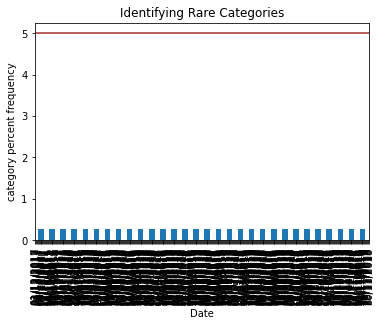

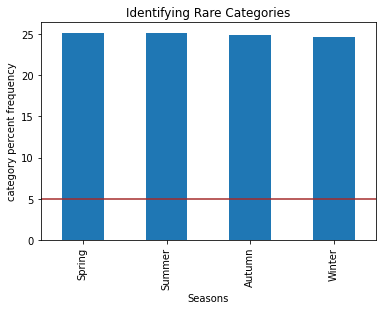

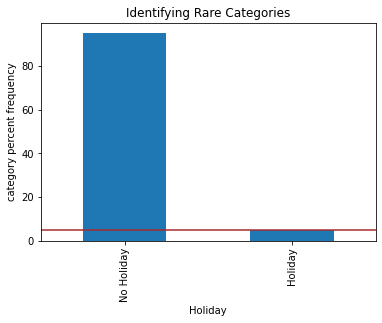

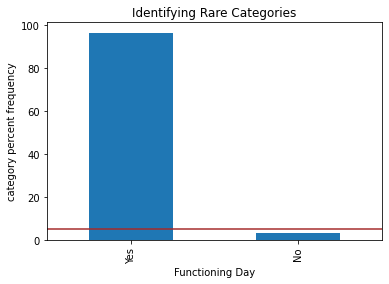

In [36]:
for var in categorical:
  check_rare(var)

### <font color = 'Orange'>**Checking target variable distribution**

In [37]:
Bike['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

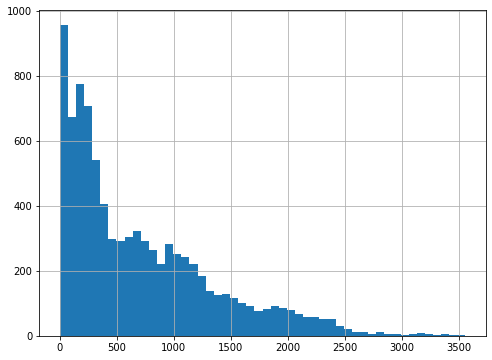

In [38]:
Bike['Rented Bike Count'].hist(bins=50, figsize=(8,6))
plt.show

### <font color = 'Orange'>**Checking continuous variables distribution**

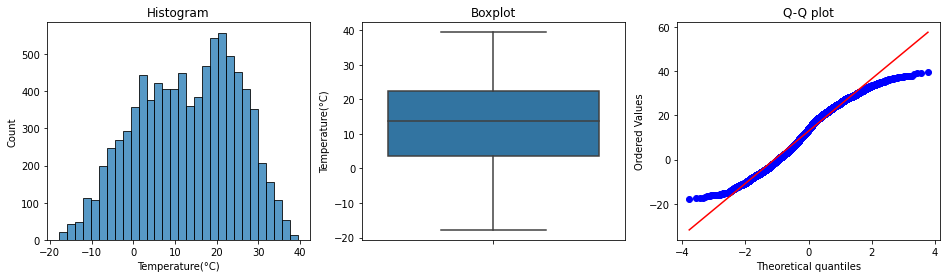

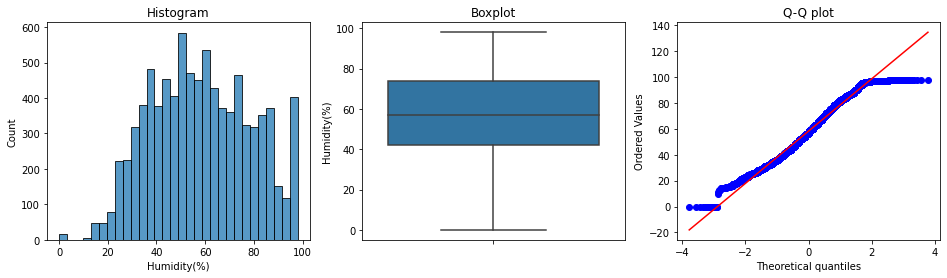

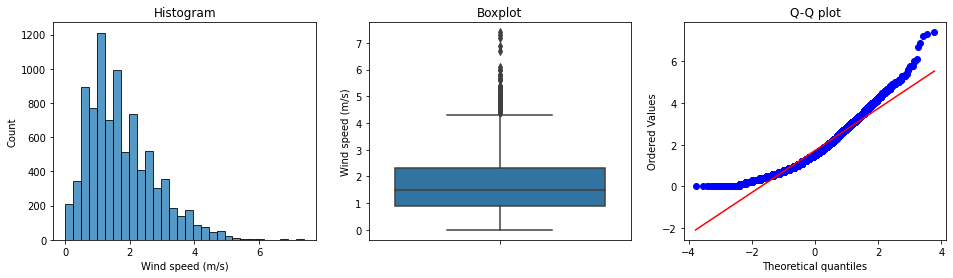

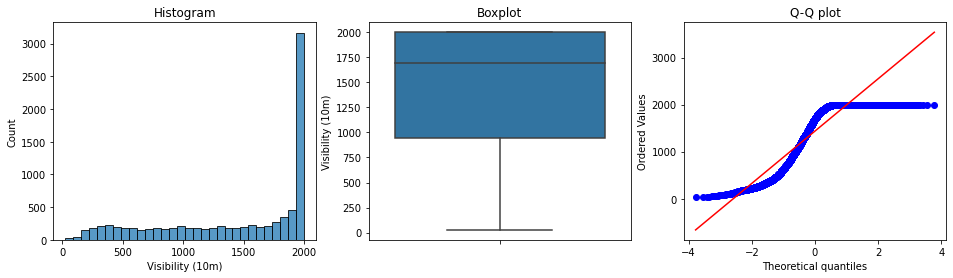

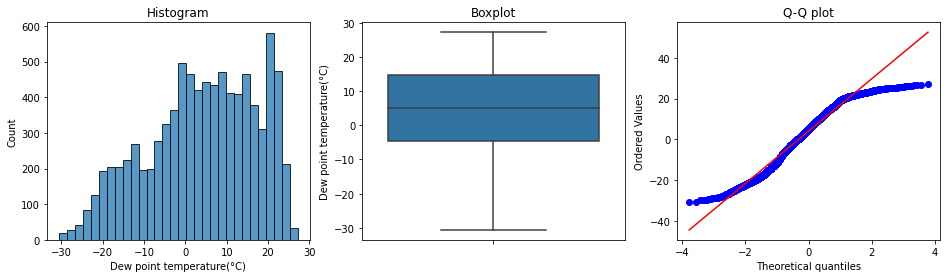

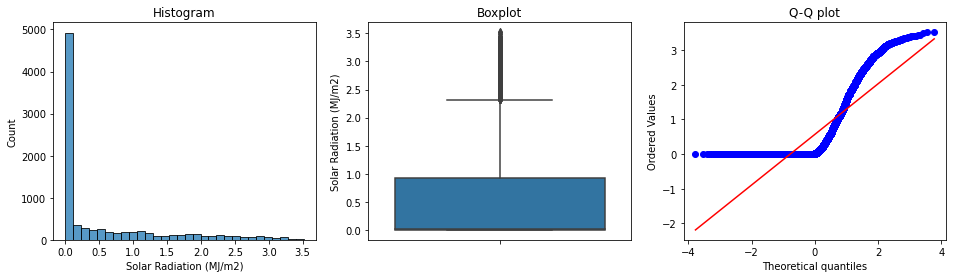

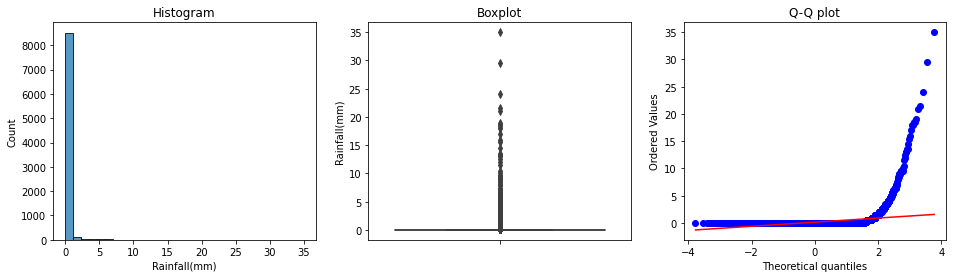

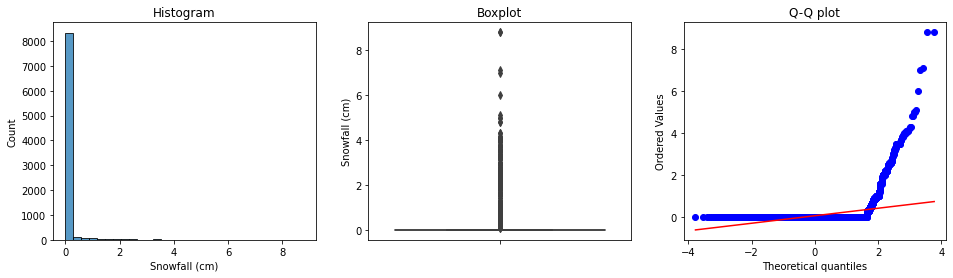

In [39]:
for var in continuous:
  diagnostic_plots(Bike, var)

### <font color = 'Orange'>**Checking discrete variable distribution**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6e0c7e640>]],
      dtype=object)

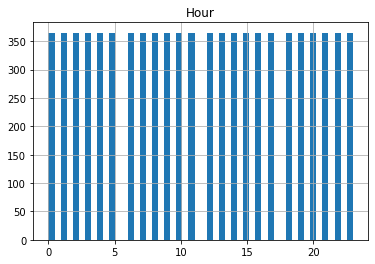

In [40]:
Bike[discrete].hist(bins=50)

## **<font color ='orange'>Visualizing Relationships between Variables**</font>

### **<font color ='orange'>Correlation Matrix**</font>

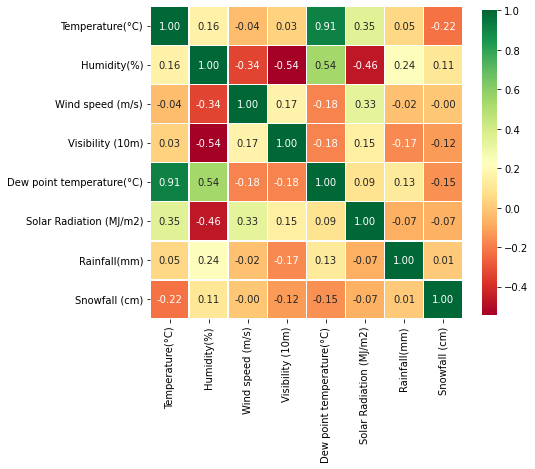

In [41]:
plt.figure(figsize=(7,7))
sns.heatmap(Bike[continuous].corr(), annot=True, square=True, fmt='.2f', 
            cbar_kws={'shrink':0.80}, linewidth=.5, cmap='RdYlGn');

#### **<font color ='orange'>Observation:**</font>

temperature and dew point temperature are highly correlated at 0.91, I will drop dew point temperature 

### **<font color ='orange'>Relationship between target variable and categorical variables**</font>

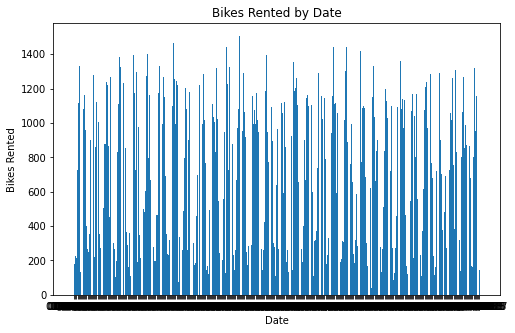

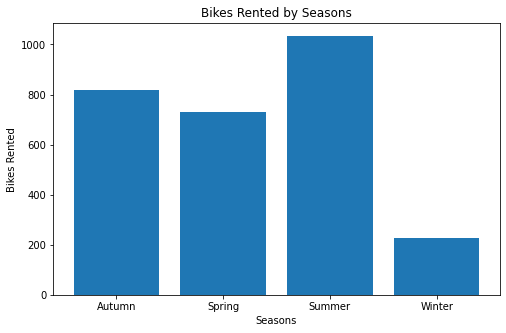

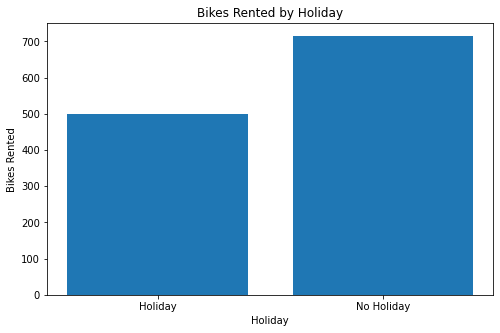

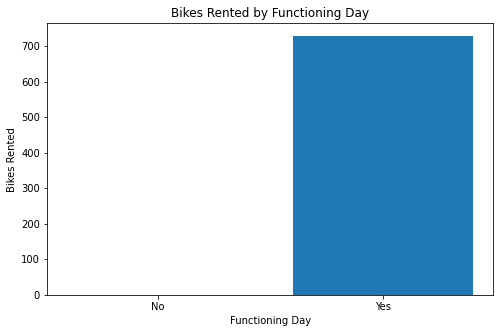

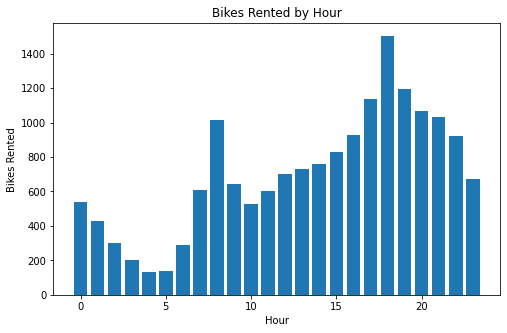

In [42]:
for category in categorical + discrete:
  plot_target_by_category(Bike, 'Rented Bike Count', category, 'Bikes Rented')

## **<font color ='orange'>Conclusions:**</font>
1. Our target variable, Rented Bike Count, is numerically continuous, so, this will be a regression model.
1. There are no single-value columns.
2. We have no missing or NA values.
7. Date and functioning day are unnecesary variables. (as this is not a time series project)
8. Dew point Temp is a redundant variable that should be dropped.
3. Categorical variables need to be converted to numerical values.
4. No rare categories present after dropping functioning day.
5. I have found significanat skewness in continuous variables, since some of the variables have 0 and negative numbers we should use yeo-jonson transformation for Temp and wind.
6. The other continuous variables don't have a normal distribition so we are going to discretize them.
9. there are outliers present in wind solar radiation, rain and snow variables
6. We will need to do feature scaling for continuous variables to ensure all of these variable have the same scale.


**<font color ='orange'>Preprocessing Steps:**</font>

1. Drop date, dewpoint and functining day variables 
3. Yeo-jonson transform continuous variables temp and wind
2. Discretize continuous variables Humidity, Visibility, Solar Radiation, Rain and Snow 
3. One hot encoding for categorical and discretized variables
4. remove outliers from wind
4. Scaling Temp and wind variables






##  <font color ='pickle'>**Creating a pipeline of regressor and preprocessing steps** 
I will use KNNRegression and gridserach to fine tune your pipeline. The aim of the piepline is to predict the rented bike count.

### **<font color ='orange'>Splitting The Data**</font>

In [43]:
X = Bike.drop('Rented Bike Count', axis=1)
y = Bike['Rented Bike Count'].copy()

In [44]:
X.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [45]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Bike, y, test_size=0.33, random_state=27 )

In [47]:
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')

Length of X_train: 5869
Length of X_test: 2891


In [48]:
print(f'Length of y_train:{len(y_train)}')
print(f'Length of y_test: {len(y_test)}')

Length of y_train:5869
Length of y_test: 2891


### **<font color ='orange'>Pipeline 1**</font>

In [49]:
continuous

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [50]:
discrete

['Hour']

In [51]:
categorical

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [52]:
columns_to_drop= ['Dew point temperature(°C)','Date', 'Functioning Day' ]

In [53]:

Bike_pipeline_1 = Pipeline([
    ('Var_drop',
     DropFeatures(columns_to_drop)),

    ('Yeo_jonson_trans',
     YeoJohnsonTransformer(variables=['Temperature(°C)', 'Wind speed (m/s)'])),

    ('discretizer_cont', 
     SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans'),
                               variables=['Humidity(%)','Visibility (10m)',
                                          'Solar Radiation (MJ/m2)','Rainfall(mm)',
                                          'Snowfall (cm)'])),
    ('discretizer_hour', 
     SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans'),
                               variables=['Hour'])),
    ('OneHotEncoder', 
     OneHotEncoder(variables=['Seasons', 'Holiday','Humidity(%)','Visibility (10m)',
                              'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)', 'Hour' ] ,
                    drop_last=True, ignore_format=True)),

    ('Outlier',
     Winsorizer(capping_method='gaussian', tail='both', variables=['Wind speed (m/s)'] )),

    ('Scalar',
     SklearnTransformerWrapper(MinMaxScaler(), variables=['Temperature(°C)', 'Wind speed (m/s)'])),

    ('KNNR',
     KNeighborsRegressor())

])

In [54]:
set_config(display='diagram')
Bike_pipeline_1

Pipeline(steps=[('Var_drop',
                 DropFeatures(features_to_drop=['Dew point temperature(°C)',
                                                'Date', 'Functioning Day'])),
                ('Yeo_jonson_trans',
                 YeoJohnsonTransformer(variables=['Temperature(°C)',
                                                  'Wind speed (m/s)'])),
                ('discretizer_cont',
                 SklearnTransformerWrapper(transformer=KBinsDiscretizer(encode='ordinal',
                                                                        n_bins=10,
                                                                        strategy='kmeans'),
                                           variables=['Humidity(%)',
                                                      '...
                 OneHotEncoder(drop_last=True, ignore_format=True,
                               variables=['Seasons', 'Holiday', 'Humidity(%)',
                                          'Visibility (10m)',
                                          'Solar Radiation (MJ/m2)',
                                          'Rainfall(mm)', 'Snowfall (cm)',
                                          'Hour'])),
                ('Outlier',
                 Winsorizer(tail='both', variables=['Wind speed (m/s)'])),
                ('Scalar',
                 SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                           variables=['Temperature(°C)',
                                                      'Wind speed (m/s)'])),
                ('KNNR', KNeighborsRegressor())])

### **<font color ='orange'>Hyperparameter Tuning-Round 1**</font>


#### <font color='orange'> **Specify Param Grid**

In [55]:
param_grid1={
    'discretizer_cont__transformer__n_bins': range(2,10,2),
    'discretizer_hour__transformer__n_bins': range(2,10,2),
    'Scalar__transformer':[StandardScaler(), MinMaxScaler()],
    'KNNR__n_neighbors': [1]
}

grid_knnr_1= GridSearchCV(Bike_pipeline_1, param_grid1, 
                          cv=5, return_train_score=True)

#### <font color = 'Orange'>**Fit Model**

In [56]:
grid_knnr_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Var_drop',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)',
                                                                       'Date',
                                                                       'Functioning '
                                                                       'Day'])),
                                       ('Yeo_jonson_trans',
                                        YeoJohnsonTransformer(variables=['Temperature(°C)',
                                                                         'Wind '
                                                                         'speed '
                                                                         '(m/s)'])),
                                       ('discretizer_cont',
                                        SklearnTransformerWrapper(transformer=KBinsDiscretizer(encode='ordinal',
                                                                                               n_bins=10,
                                                                                               strateg...
                                        SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                                                  variables=['Temperature(°C)',
                                                                             'Wind '
                                                                             'speed '
                                                                             '(m/s)'])),
                                       ('KNNR', KNeighborsRegressor())]),
             param_grid={'KNNR__n_neighbors': [1],
                         'Scalar__transformer': [StandardScaler(),
                                                 MinMaxScaler()],
                         'discretizer_cont__transformer__n_bins': range(2, 10, 2),
                         'discretizer_hour__transformer__n_bins': range(2, 10, 2)},
             return_train_score=True)

#### <font color = 'orange'>**Get Best Params**

In [57]:

print(grid_knnr_1.best_params_ )

{'KNNR__n_neighbors': 1, 'Scalar__transformer': MinMaxScaler(), 'discretizer_cont__transformer__n_bins': 2, 'discretizer_hour__transformer__n_bins': 2}


#### <font color = 'orange'>**Saving Model**

In [58]:
file_best_estimator_round1 = save_model_folder / 'knnr_round1_best_estimator.pkl'
file_complete_grid_round1 = save_model_folder / 'knnr_round1_complete_grid.pkl'

In [59]:
joblib.dump(grid_knnr_1.best_estimator_, file_best_estimator_round1)
joblib.dump(grid_knnr_1, file_complete_grid_round1)

['/content/drive/MyDrive/Data/models/ml_fall_2022/knnr_round1_complete_grid.pkl']

#### <font color = 'orange'>**Load Saved Model**

In [60]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

### <font color = 'orange'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

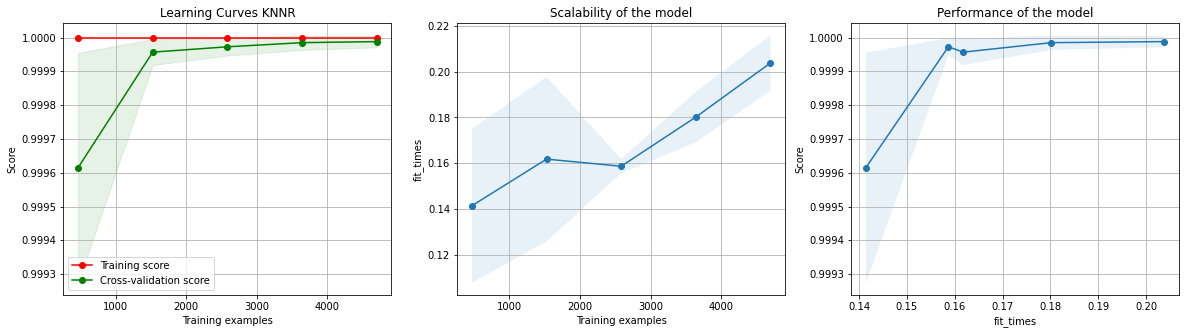

In [ ]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves KNNR', X_train, y_train, n_jobs=-1)

### <font color = 'orange'>**Check Cross Validation Score and Train Score**

In [62]:
#let's check the train scores
print(f'Training dataset score: {loaded_best_estimator_round1.score(X_train,y_train)}')

#let's check the cross validation score
print(f'Validation dataset score: {loaded_complete_grid_round1 .best_score_}') 

Training dataset score: 1.0
Validation dataset score: 0.9999879254268029


### **<font color ='orange'>Hyperparameter Tuning-Round 2**</font>


#### <font color='orange'> **Specify Param Grid**

In [ ]:
param_grid2={
    'discretizer_cont__transformer__n_bins': [2],
    'discretizer_hour__transformer__n_bins': [2],
    'Scalar__transformer':[MinMaxScaler()],
    'KNNR__n_neighbors': range(1,10),
}

grid_knnr_2= GridSearchCV(Bike_pipeline_1, param_grid2, 
                          cv=5, return_train_score=True)

#### <font color = 'Orange'>**Fit Model**

In [ ]:
grid_knnr_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Var_drop',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)',
                                                                       'Date',
                                                                       'Functioning '
                                                                       'Day'])),
                                       ('Yeo_jonson_trans',
                                        YeoJohnsonTransformer(variables=['Temperature(°C)',
                                                                         'Wind '
                                                                         'speed '
                                                                         '(m/s)'])),
                                   

#### <font color = 'orange'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knnr_2.best_params_)

{'KNNR__n_neighbors': 1, 'Scalar__transformer': MinMaxScaler(), 'discretizer_cont__transformer__n_bins': 2, 'discretizer_hour__transformer__n_bins': 2}


#### <font color = 'orange'>**Round 2 Observations**

Best parameters are the same as Round 1 

### **<font color ='orange'>Hyperparameter Tuning-Round 3**</font>


#### <font color='orange'> **Specify Param Grid**

In [ ]:
param_grid3={
    'Scalar__transformer':[MinMaxScaler(), StandardScaler],
    'KNNR__n_neighbors': range(1,8),
}

grid_knnr_3= GridSearchCV(Bike_pipeline_1, param_grid3, 
                          cv=5, return_train_score=True)

#### <font color = 'Orange'>**Fit Model**

In [ ]:
grid_knnr_3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Var_drop',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)',
                                                                       'Date',
                                                                       'Functioning '
                                                                       'Day'])),
                                       ('Yeo_jonson_trans',
                                        YeoJohnsonTransformer(variables=['Temperature(°C)',
                                                                         'Wind '
                                                                         'speed '
                                                                         '(m/s)'])),
                                   

#### <font color = 'orange'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knnr_3.best_params_ )

{'KNNR__n_neighbors': 1, 'Scalar__transformer': MinMaxScaler()}


#### <font color = 'orange'>**Saving Model**

In [ ]:
file_best_estimator_round3 = save_model_folder / 'knnr_round3_best_estimator.pkl'
file_complete_grid_round3 = save_model_folder / 'knnr_round3_complete_grid.pkl'

In [ ]:
joblib.dump(grid_knnr_3.best_estimator_, file_best_estimator_round3)
joblib.dump(grid_knnr_3, file_complete_grid_round3)

['/content/drive/MyDrive/Data/models/ml_fall_2022/knnr_round3_complete_grid.pkl']

#### <font color = 'orange'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)
loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

### <font color = 'orange'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

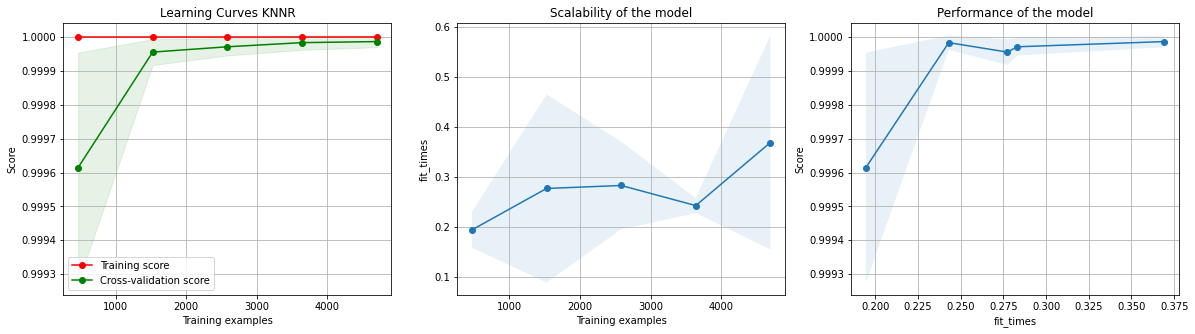

In [ ]:
plot_learning_curve(loaded_best_estimator_round3, 'Learning Curves KNNR', X_train, y_train, n_jobs=-1)

### <font color = 'orange'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round3.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round3.best_score_) 

1.0
0.9999874133358698


### <font color = 'orange'>**Model Conclusion**

*Tried* 3 different variations of hyperparamet tunning all 3 gave me the same result, I will test my model using Round 1 

## <font color = 'orange'>**Performance on Test Data**

In [63]:
print(f'Test data accuracy: {loaded_best_estimator_round1.score(X_test, y_test)}')

Test data accuracy: 0.9999878751682847


### <font color = 'orange'>**Final Thoughts**

Very happy that with this model we can predict how many bikes will be rented on a given day with 99.99% accuracy